# Trying out NumPy's SVD on Medical Images

In [1]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

%matplotlib inline

In [2]:
#Parameters
vmin = 0
vmax = 1
image_bias = 1 

Import image to take SVD of

Size of the image is :  (300, 300)


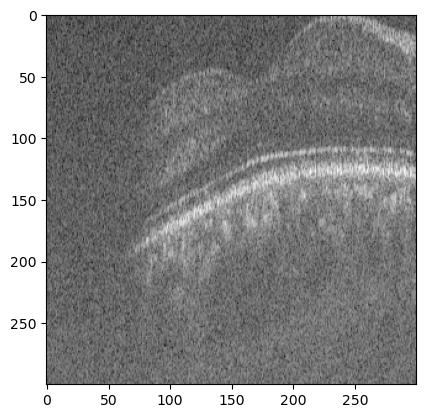

In [3]:
# Open the PNG image
image = Image.open('sample2.tiff')

# Convert the image to grayscale
grayscale_image = image.convert('L')

# Convert the image to a NumPy array
A = np.array(grayscale_image)

# Remember image size
n = len(A)
print("Size of the image is : " , A.shape)

# Show image
imshow(A, cmap='gray')
plt.show()

## Taking SVD

In [4]:
U, S, V = svd(A)

## Observing U

In [5]:
# Size of U
print("Size of U is: ", U.shape)

Size of U is:  (300, 300)


In [6]:
print(np.round(U,2))

[[-0.05  0.02 -0.05 ... -0.02 -0.01  0.05]
 [-0.05  0.02 -0.05 ... -0.05  0.01 -0.07]
 [-0.05  0.03 -0.05 ...  0.04 -0.05  0.01]
 ...
 [-0.06 -0.02 -0.04 ... -0.    0.01 -0.1 ]
 [-0.06 -0.03 -0.05 ...  0.   -0.    0.04]
 [-0.06 -0.04 -0.05 ...  0.02  0.01  0.06]]


## Observing S

In [7]:
# Size of U
print("Size of Sigma is: ", S.shape)

Size of Sigma is:  (300,)


In [8]:
sigma = np.diag(S)
print(np.round(sigma,2))

[[3.38167e+04 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [0.00000e+00 2.60188e+03 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [0.00000e+00 0.00000e+00 1.83174e+03 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.55000e+00 0.00000e+00
  0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.22000e+00
  0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  1.70000e-01]]


NumPy saves sigma as a vector not a Matrix. Remember to create a diagonal matrix from it first.

## Observing V

In [9]:
# Size of V
print("Size of V is: ", V.shape)

Size of V is:  (300, 300)


In [10]:
print(np.round(V,2))

[[-0.05 -0.05 -0.05 ... -0.06 -0.06 -0.06]
 [-0.03 -0.04 -0.05 ...  0.07  0.05  0.05]
 [-0.07 -0.07 -0.09 ... -0.08 -0.06 -0.07]
 ...
 [ 0.07 -0.1   0.1  ...  0.08 -0.02 -0.1 ]
 [ 0.03  0.06  0.06 ... -0.06 -0.01 -0.03]
 [ 0.12 -0.07 -0.03 ...  0.03  0.05 -0.05]]


## Taking Sums

### First matrix

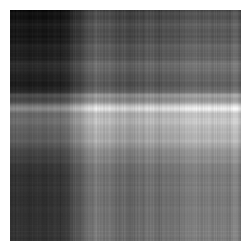

In [11]:
# Get first matrix
first = S[0]*np.outer(U[:,0],V[0])

# Plot first matrix
plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(first, cmap='gray')
plt.axis('off')
plt.show()

### Second Matrix + Overall sum

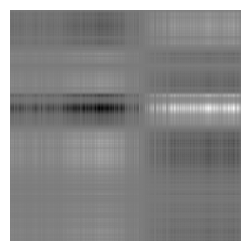

In [12]:
# Get first matrix
second = S[1]*np.outer(U[:,1],V[1])

# Plot scond matrix
plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(second, cmap='gray')
plt.axis('off')
plt.show()

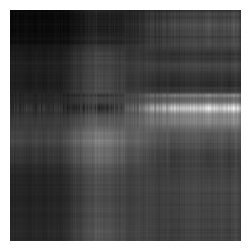

In [13]:
# Plot overall sum
img_sum = first + second

plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(img_sum, cmap='gray')
plt.axis('off')
plt.show()

### Third matrix + overall sum

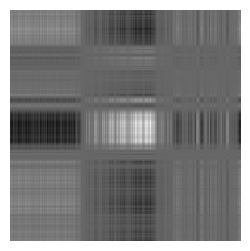

In [14]:
# Get first matrix
third = S[2]*np.outer(U[:,2],V[2])

# Plot scond matrix
plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(third, cmap='gray')
plt.axis('off')
plt.show()

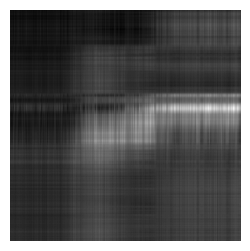

In [15]:
# Plot overall sum
img_sum += third

plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(img_sum, cmap='gray')
plt.axis('off')
plt.show()

## Get first N Sums

In [26]:
def get_image(U, S, V, N = 50, plot=True):
    final_img = np.zeros((n, n))
    
    for i in range(N):
        matrix = S[i]*np.outer(U[:,i],V[i])
        final_img += matrix
    
    if plot:
        plt.figure(figsize=(5, 5))
        plt.imshow(final_img, cmap='gray')
        plt.axis('off')
        plt.show()
    
    return final_img

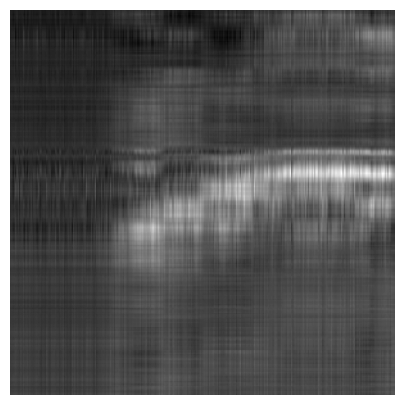

In [17]:
N_5 = get_image(U, S, V, N = 5)

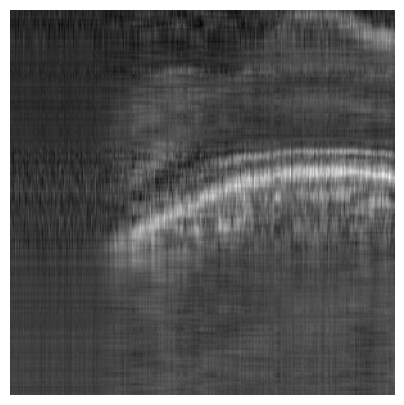

In [18]:
N_10 = get_image(U, S, V, N = 10)

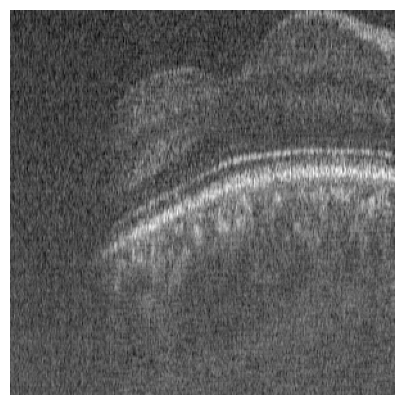

In [19]:
N_50 = get_image(U, S, V, N = 50)

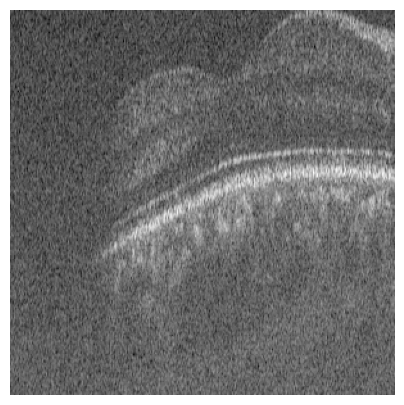

In [20]:
N_100 = get_image(U, S, V, N = 100)

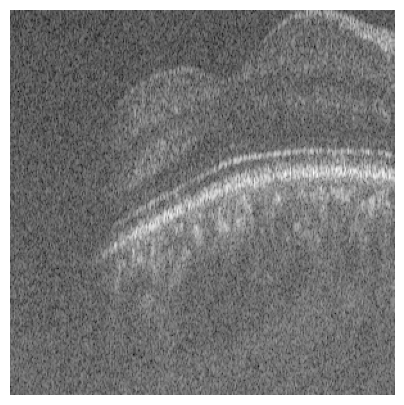

In [21]:
N_250 = get_image(U, S, V, N = 250)

## Plotting it all

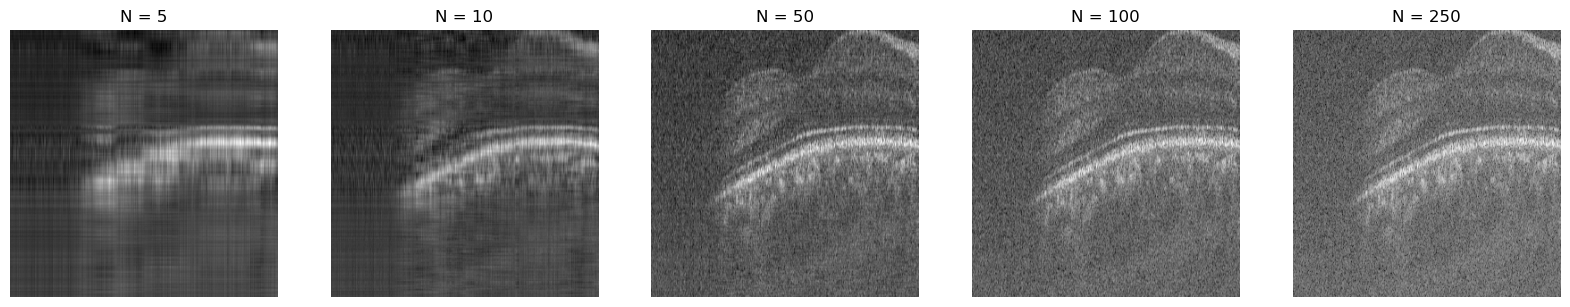

In [22]:
images = [N_5, N_10, N_50, N_100, N_250]
N_values = [5, 10, 50, 100, 250]

# Create a figure and subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

# Plot each image on a separate subplot
for i in range(5):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('N = {}'.format(N_values[i]))

plt.show()

## Compare Original and Truncated

AttributeError: 'int' object has no attribute 'items'

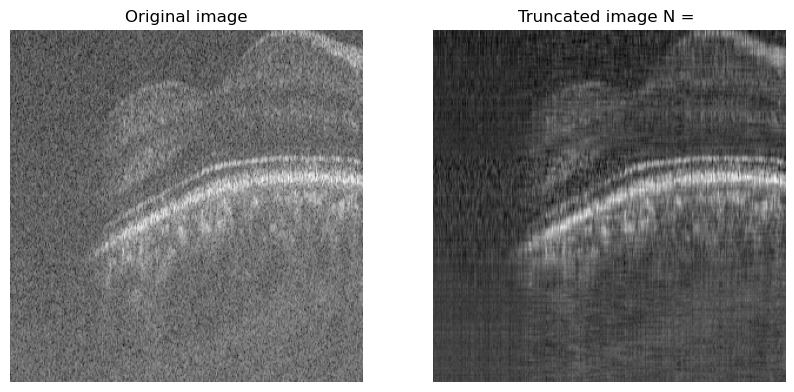

In [29]:
power = 20
trunc = get_image(U, S, V, N = power, plot=False)

plt.figure(figsize=(10, 5))  # Adjust the figure size as needed

# Plot original on the left
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='gray')
plt.axis('off')
plt.title('Original image')

# Plot truncated on the right
plt.subplot(1, 2, 2)
plt.imshow(trunc, cmap='gray')
plt.axis('off')
plt.title('Truncated image N = {}',power)

plt.show()